# SMDM PROJECT: CREDIT SCORE CLASSIFICATION

### Group Members: </br>

Anuj Purandare </br>
Janvi Saddi  </br>
Jainam Shah  </br>

#### Steps for Implementation: 

Importing Libraries <br/>
Loading the CSV<br/>
Exploratory Data Analysis<br/>
Treating Outliers<br/>
Drop and Fill N/A<br/>
Handling missing values <br/>
Feature Engineering<br/>
Feature Encoding<br/>
Splitting The Dataset into train and test<br/>
Model Training: <br/>
                - Logistic Regression<br/>
                - KNN<br/>
                - Gaussian Naive Bayes<br/>
                - Decision Tree<br/>
                - Random Forest<br/>
                - XGBoost<br/>
                - Stacking Classifier <br/>
Comparing The baseline models 



##### Step 1: Importing Libraries

In [ ]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

##### Step 2: Loading the CSV file

In [ ]:
df = pd.read_csv('train.csv')
df.head()


C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\274144450.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.shape

(100000, 28)

In [ ]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
df_new = df[df.Occupation!= "_______"]

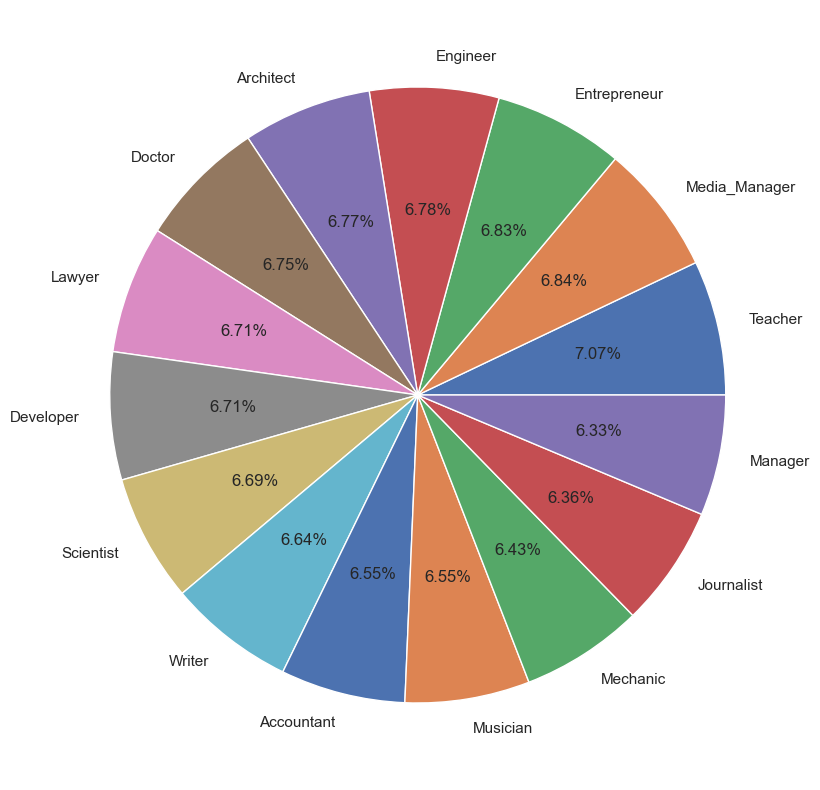

In [ ]:
Occupation = df_new['Occupation'].value_counts().tolist()
labels = df_new['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (10,10))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')
plt.show()

Clearly the dataset is very evenly distributed with respect to the Occupation. Every occupation contributes to ~ 7% of the dataset.


#### Step 3:  Exploratory Data Analysis (EDA)

Month, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Credit_Score are categorical data so need to convert this data in categorical form 

In [ ]:
df.Month = df.Month.astype('category')
df.Occupation = df.Occupation.astype('category')
df.Type_of_Loan = df.Type_of_Loan.astype('category')
df.Credit_Mix = df.Credit_Mix.astype('category')
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.astype('category')
df.Payment_Behaviour = df.Payment_Behaviour.astype('category')
df.Credit_Score = df.Credit_Score.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['ID'] = df['ID'].apply(lambda x: int(x[2:], 16))

In [ ]:
df['ID'].dtype

dtype('int64')

In [ ]:
df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [ ]:
df["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [ ]:
b=""
for i in df["Age"]:
    if i.isalnum() or i.isspace(): 
        b+=i
print(df["Age"])

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object


In [ ]:
df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [ ]:
def split_it(year):
    return re.findall("[0-9][0-9]", df_new["Age"])

In [ ]:
df["Age"] = df["Age"].str.replace("_", "")

In [ ]:
df['Age'].unique()


array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [ ]:
df = df.drop(df[df["Age"] == "-500"].index)

In [ ]:
df["Age"]

0        23
1        23
3        23
4        23
5        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 99114, dtype: object

In [ ]:
df["Age"] = df["Age"].astype(int)

In [ ]:
df["Age"]

0        23
1        23
3        23
4        23
5        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 99114, dtype: int32

In [ ]:
### A function to remove the '_' in the data

def removeUnderscore(value):
    first_index = 0
    last_index = len(value) - 1
    while first_index <= last_index:
        if value[first_index] == '_':
            first_index += 1
        if value[last_index] == '_':
            last_index -= 1
        if '_' not in value[first_index : last_index + 1]:
            if value[first_index : last_index + 1] == '':
                return 0
            else:
                return value[first_index : last_index + 1]
    

def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(df[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))
        
        df[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99114 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        99114 non-null  int64   
 1   Customer_ID               99114 non-null  object  
 2   Month                     99114 non-null  category
 3   Name                      89226 non-null  object  
 4   Age                       99114 non-null  float64 
 5   SSN                       99114 non-null  object  
 6   Occupation                99114 non-null  category
 7   Annual_Income             99114 non-null  float64 
 8   Monthly_Inhand_Salary     84247 non-null  float64 
 9   Num_Bank_Accounts         99114 non-null  int64   
 10  Num_Credit_Card           99114 non-null  int64   
 11  Interest_Rate             99114 non-null  int64   
 12  Num_of_Loan               99114 non-null  float64 
 13  Type_of_Loan              87811 non-null  cate

In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9888
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14867
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11303
Delay_from_due_date             0
Num_of_Delayed_Payment       6948
Changed_Credit_Limit            0
Num_Credit_Inquiries         1941
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8954
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4441
Payment_Behaviour               0
Monthly_Balance              1194
Credit_Score                    0
dtype: int64

<AxesSubplot:>

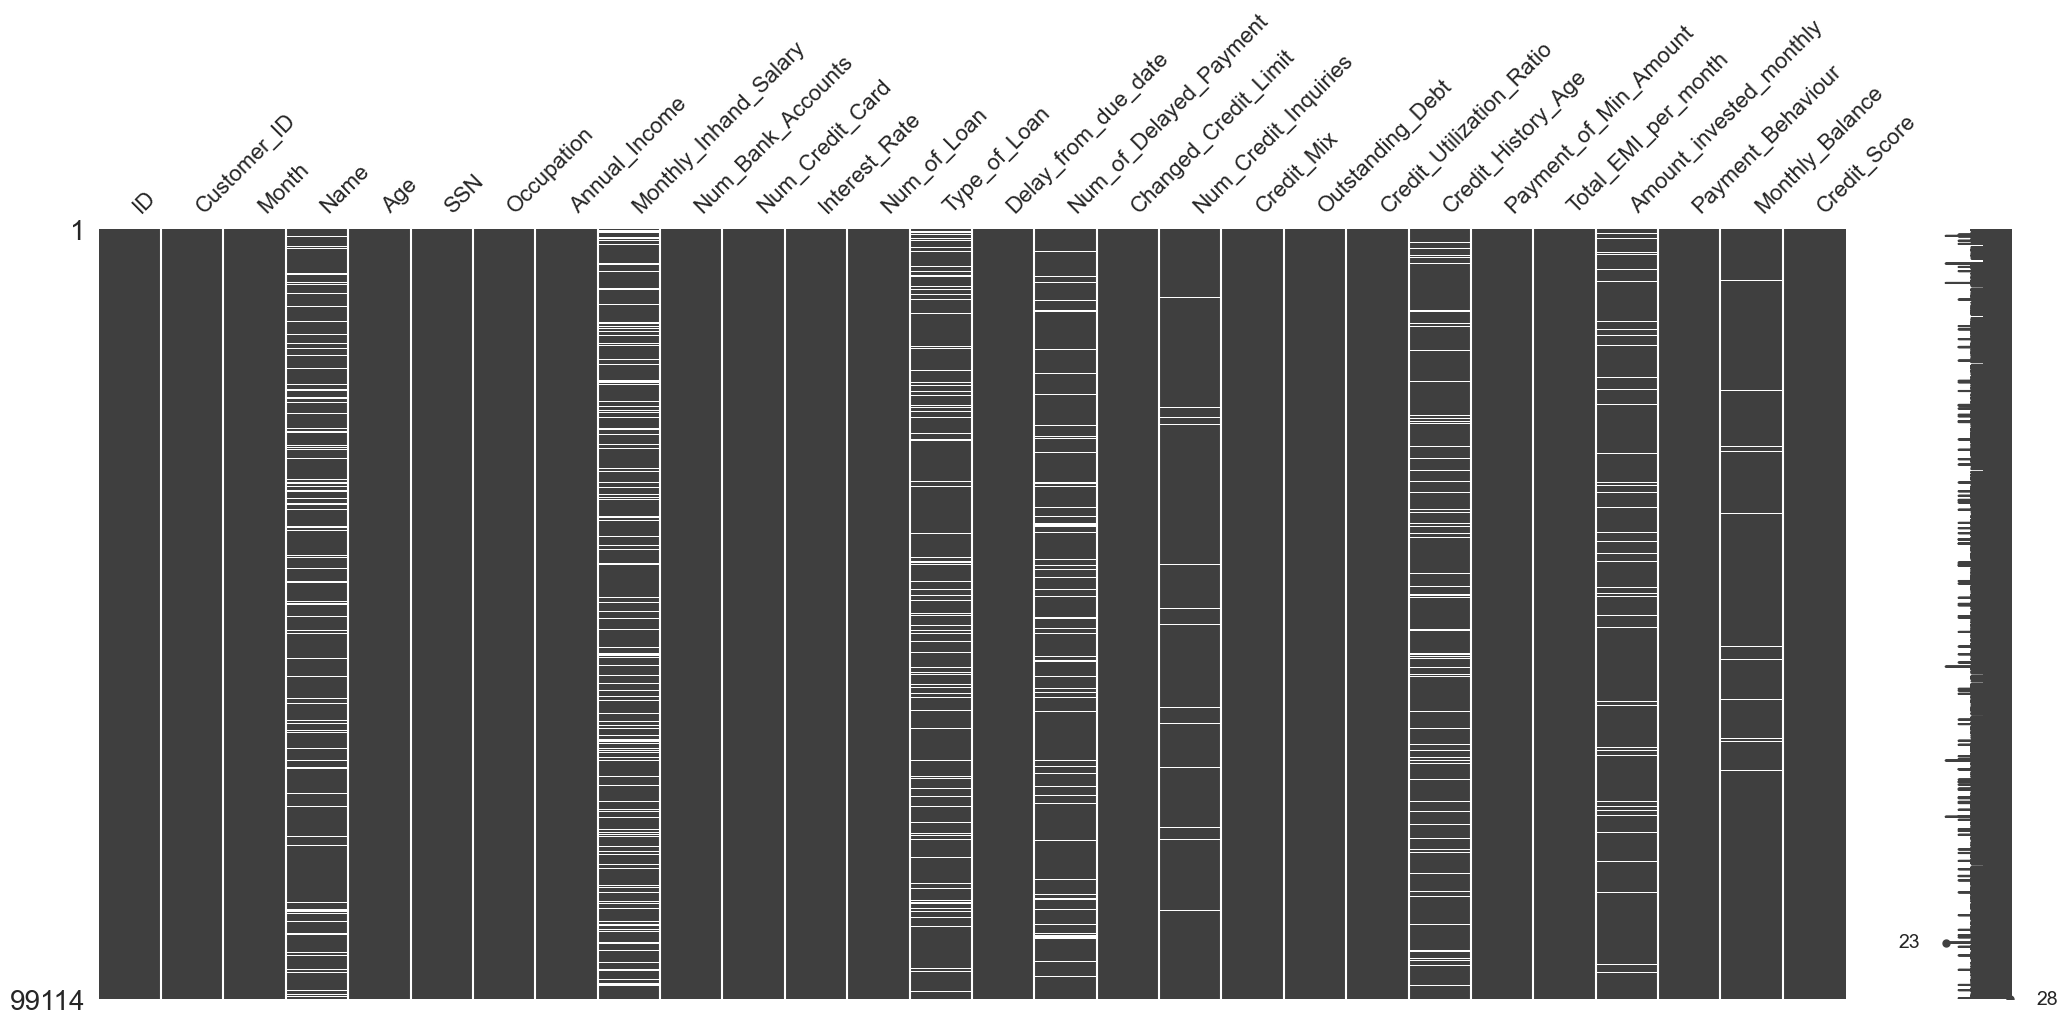

In [ ]:
### Visual representation of the missing data in the dataset

missingno.matrix(df)

In [ ]:
df.describe()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,99114.000000,99114.000000,9.911400e+04,84247.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,92166.000000,99114.000000,97173.000000,99114.000000,99114.000000,99114.000000,94673.000000,9.792000e+04
mean,80629.848730,116.108421,1.771283e+05,4195.263581,17.177432,22.470055,72.350717,2.990718,21.064925,30.745589,10.171693,27.793482,1426.364254,32.284446,1401.561497,637.503793,-3.063725e+22
std,43301.469636,686.861274,1.434618e+06,3183.366880,117.845592,129.012158,466.152398,62.472428,14.854316,224.755011,6.880824,193.361901,1155.233496,5.116639,8301.531690,2043.360066,3.195557e+24
min,5634.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,43122.250000,25.000000,1.946645e+04,1626.525000,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.057500,28.052221,30.338204,74.573916,2.701402e+02
50%,80635.500000,33.000000,3.758034e+04,3096.154167,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.230000,32.305569,69.272824,135.955352,3.367341e+02
75%,118134.750000,42.000000,7.281648e+04,5961.637500,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.680000,36.494811,161.340704,265.758903,4.702058e+02
max,155629.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


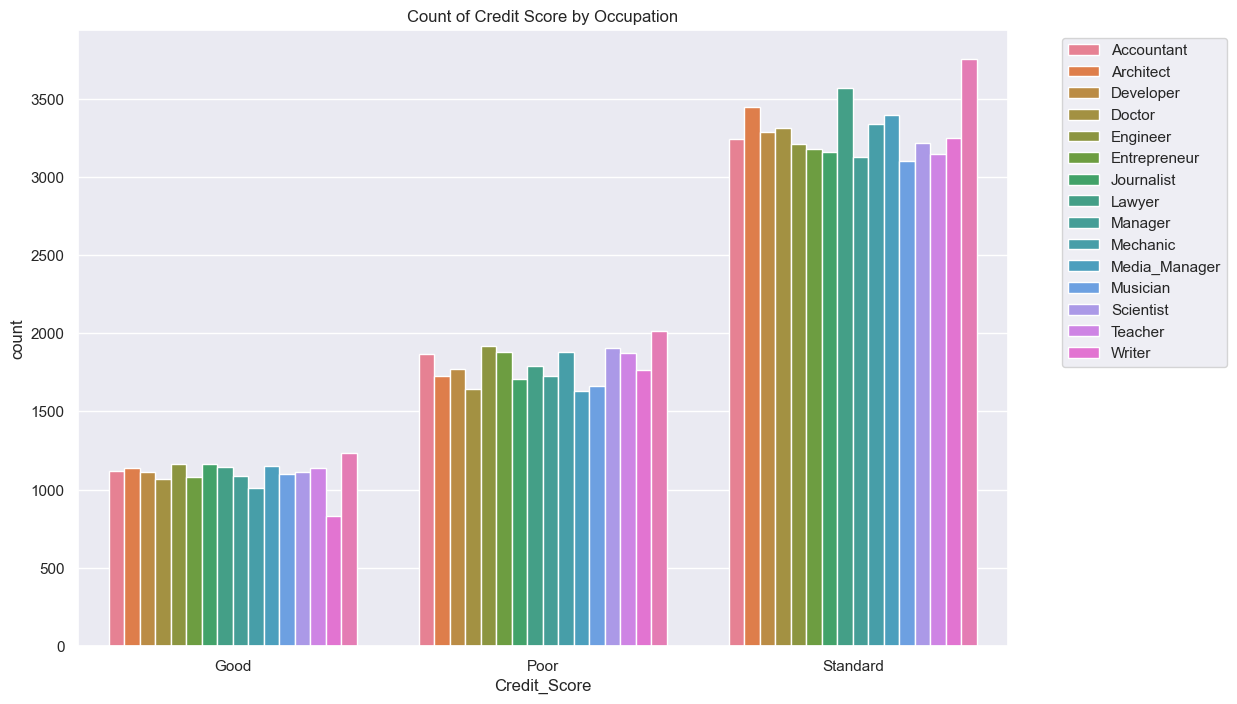

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='Credit_Score', hue='Occupation', palette='husl')
plt.legend(title='Occupation', loc='upper right')
plt.title('Count of Credit Score by Occupation')
# adjust the legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the above graphs, we can see that most of the people have a Credit Score in the Standard range for all the Occupations.

In [ ]:
### Fetching the not null data of the column - Type of Data 

index_values = ~df['Type_of_Loan'].isnull().values
loan_type_data = list(df['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specifie

In [ ]:
### Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37655,
 'Credit-Builder Loan': 40113,
 'Personal Loan': 38558,
 'Home Equity Loan': 38744,
 'Not Specified': 39228,
 'Mortgage Loan': 38593,
 'Student Loan': 38620,
 'Debt Consolidation Loan': 38440,
 'Payday Loan': 40210}

In [ ]:
loan_counts = df['Type_of_Loan'].str.split(',').explode().str.strip().value_counts()

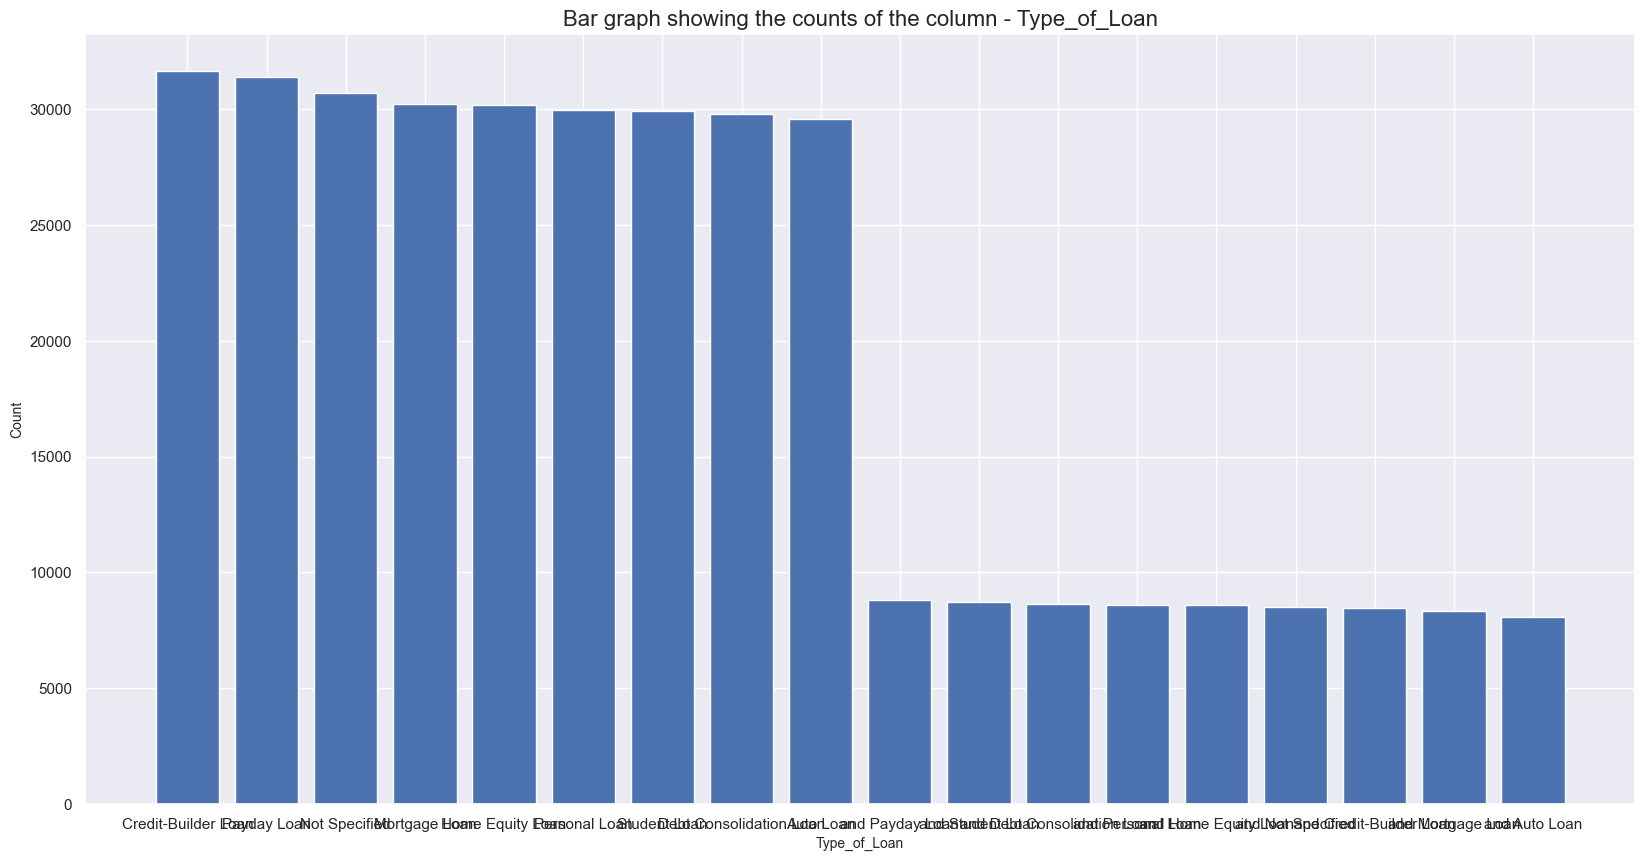

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(loan_counts.index, loan_counts.values)
ax.set_title('Bar graph showing the counts of the column - Type_of_Loan', fontsize=16)
ax.set_xlabel('Type_of_Loan', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
plt.show()

In [ ]:
### Value counts of the column - Credit_Mix

credit_mix_count = df['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    36176
Good        24112
_           20019
Bad         18807
Name: Credit_Mix, dtype: int64

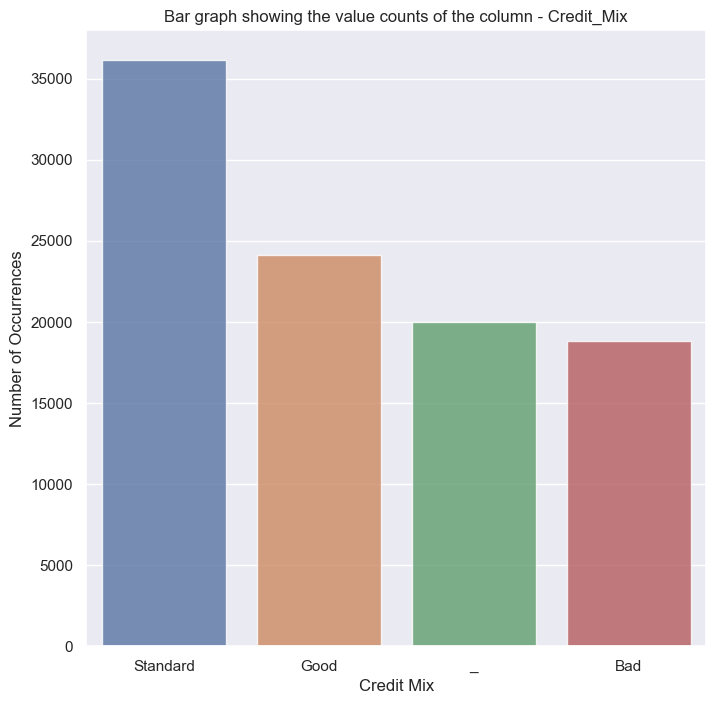

In [ ]:
sns.set(rc = {'figure.figsize': (8, 8)})
sns.barplot(x=list(credit_mix_count.index), y=list(credit_mix_count.values), alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

From the above graph, we can see that most of the customers have a 'Standard' credit mix.

In [ ]:
### Value counts of the column - Payment_of_Min_Amount

min_amount_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

Yes    51878
No     35346
NM     11890
Name: Payment_of_Min_Amount, dtype: int64

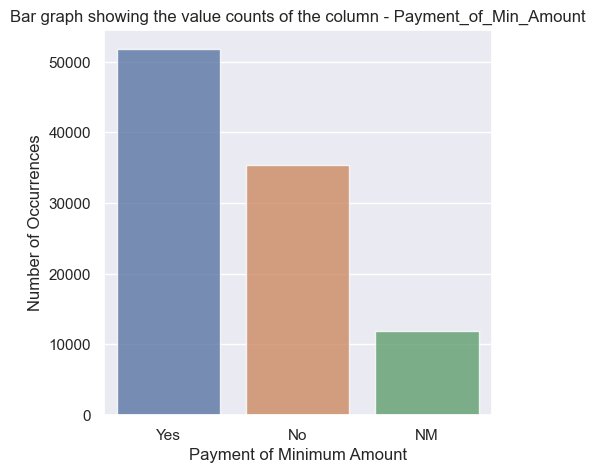

In [ ]:
### Bar graph showing the value counts of the column - Payment_of_Min_Amount

sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(x=list(min_amount_count.index), y=list(min_amount_count.values), alpha=0.8)
#sns.barplot(min_amount_count.index, min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customer's paid a minimum amount for their loans.



Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

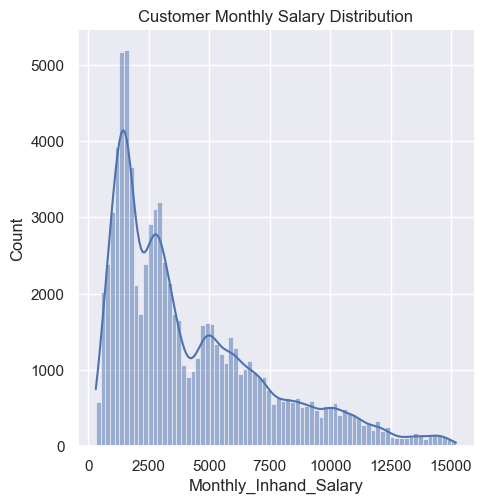

In [ ]:
### Understanding the distribution of the column - Monthly_Inhand_Salary
sns.displot(df['Monthly_Inhand_Salary'], kde=True)
plt.title('Customer Monthly Salary Distribution')

From the above graph, we can see that the distribution is right skewed and has a slight degree of skewness.



Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

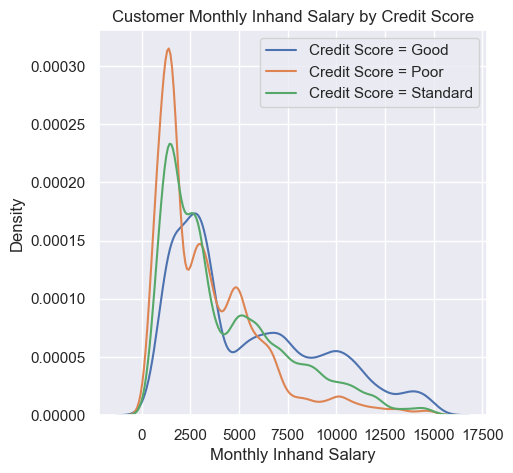

In [ ]:
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.



Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

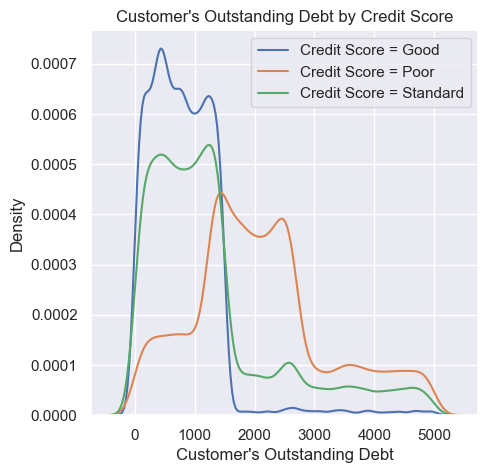

In [ ]:
### Merging the above graphs into one

sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

##### Treating Outliers

In [ ]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(df.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(df, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 451 indices:  [1293, 2902, 3189, 3690, 7036, 8558, 8660, 10840, 12673, 13036, 13486, 17379, 17827, 18004, 20250, 20537, 20538, 22612, 24240, 24736, 25123, 25878, 27875, 28278, 30249, 31288, 31985, 34160, 34565, 35783, 36015, 36053, 36855, 36985, 37534, 39169, 39393, 44633, 46737, 47961, 48455, 48536, 48794, 50233, 51828, 53352, 54009, 54030, 56166, 59049, 60659, 61146, 61938, 63816, 65928, 68449, 68810, 76155, 77767, 78865, 81038, 81041, 82992, 83102, 84577, 85316, 86615, 88487, 91181, 95268, 96236, 96522, 420, 2355, 2358, 3015, 3688, 3829, 4650, 7693, 8690, 8743, 8798, 9180, 9382, 10026, 12492, 13262, 17382, 195

In [ ]:
df.loc[outliers_to_drop, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1293,7571,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,...,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,!@9#%8,269.053164,Good
2902,9984,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,...,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
3189,10415,CUS_0x3fa8,June,Kumarp,471.0,283-56-6375,Writer,177243.920,14526.326667,4,...,Good,488.95,37.041853,28 Years and 9 Months,NM,284.804197,485.387942,!@9#%8,942.440528,Standard
3690,11168,CUS_0x29b2,March,Martinnet,1170.0,626-80-0791,Media_Manager,59930.040,5207.170000,7,...,Bad,4474.29,32.303684,1 Years and 11 Months,Yes,156.596164,165.383895,High_spent_Medium_value_payments,448.736941,Standard
7036,16186,CUS_0x3949,May,Scotto,6520.0,908-89-0498,Musician,63353.680,5356.473333,9,...,Bad,4362.52,31.463332,1 Years and 2 Months,NM,390.451288,233.035327,Low_spent_Large_value_payments,182.160718,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96585,150511,CUS_0xbe4d,February,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,28.977497,5 Years and 4 Months,Yes,446.366715,118.788667,High_spent_Medium_value_payments,266.862618,Standard
96586,150512,CUS_0xbe4d,March,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,NaN,7,...,Bad,4320.49,24.809802,5 Years and 5 Months,Yes,446.366715,287.084007,Low_spent_Medium_value_payments,128.567278,Poor
96589,150515,CUS_0xbe4d,June,NaN,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,29.395568,5 Years and 8 Months,Yes,446.366715,545.426595,Low_spent_Small_value_payments,NaN,Poor
96590,150516,CUS_0xbe4d,July,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,_,4320.49,26.766928,5 Years and 9 Months,Yes,446.366715,168.901072,High_spent_Medium_value_payments,216.750214,Poor


In [ ]:
### Drop outliers and reset index

print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))

Before: 99114 rows
After: 98663 rows


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5637,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
3,5638,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
4,5639,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [ ]:
df.shape

(98663, 28)

### Drop and fill missing values


In [ ]:
### Dropping the columns from the dataset

df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_Mix', 'Num_of_Loan',
             'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_Behaviour', 
             'Annual_Income', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card'], axis = 1, inplace = True)
df

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,January,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,No,49.574949,80.415295,Good
1,February,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,No,49.574949,118.280222,Good
2,April,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,No,49.574949,199.458074,Good
3,May,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,No,49.574949,41.420153,Good
4,June,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,809.98,No,49.574949,62.430172,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98658,April,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,No,35.104023,60.971333,Poor
98659,May,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,No,35.104023,54.185950,Poor
98660,June,25.0,Mechanic,3359.415833,5729,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,No,35.104023,24.028477,Poor
98661,July,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,502.38,No,35.104023,251.672582,Standard


In [ ]:
### Looking at the missing values in the dataset

df.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary      14801
Type_of_Loan               11287
Num_of_Delayed_Payment      6920
Amount_invested_monthly     4414
Num_Credit_Inquiries        1925
Month                          0
Age                            0
Occupation                     0
Interest_Rate                  0
Delay_from_due_date            0
Changed_Credit_Limit           0
Outstanding_Debt               0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Credit_Score                   0
dtype: int64

From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries. Here, we will focus on removing the missing values in the columns - Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, and Num_Credit_Inquiries. However, we will replace the missing values in the column - Type_of_Loan in the Feature Engineering section.

### Handling missing values 

In [ ]:
### Finding the mean value of the column - Monthly_Inhand_Salary in the dataset using Credit_Score

salary_good_mean = np.mean(df[df['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(df[df['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(df[df['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])

(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5383.458471664179, 3372.3156591421625, 4239.684661808734)

In [ ]:
def fill_salary(row):
    if pd.isna(row['Monthly_Inhand_Salary']):
        if row['Credit_Score'] == 'Good':
            return salary_good_mean
        elif row['Credit_Score'] == 'Poor':
            return salary_poor_mean
        else:
            return salary_standard_mean
    else:
        return row['Monthly_Inhand_Salary']

df['Monthly_Inhand_Salary'] = df.apply(fill_salary, axis=1)

In [ ]:
### Checking if there are any missing values of Monthly_Inhand_Salary in the dataset

df['Monthly_Inhand_Salary'].isnull().sum()

0

In [ ]:
df["Monthly_Inhand_Salary"].isna().sum()

0

In [ ]:
### Finding the median value of the column - Num_of_Delayed_Payment in the dataset

payment_index = list(~df['Num_of_Delayed_Payment'].isnull())
median_payment = np.median(df['Num_of_Delayed_Payment'].loc[payment_index])
median_payment

14.0

In [ ]:
### Replacing the missing values of the column - Num_of_Delayed_Payment in the dataset

df['Num_of_Delayed_Payment'].fillna(median_payment, inplace = True)

In [ ]:
### Checking if there are any missing values of Num_of_Delayed_Payment in the dataset

df['Num_of_Delayed_Payment'].isnull().sum()

0

In [ ]:
### Finding the median value of the column - Amount_invested_monthly in the dataset

amount_index = list(~df['Amount_invested_monthly'].isnull())
median_amount = np.median(df['Amount_invested_monthly'].loc[amount_index])
median_amount

135.94451724151958

In [ ]:
### Replacing the missing values of the column - Amount_invested_monthly in the dataset

df['Amount_invested_monthly'].fillna(median_amount, inplace = True)

In [ ]:
### Checking if there are any missing values of Amount_invested_monthly in the dataset

df['Amount_invested_monthly'].isnull().sum()

0

In [ ]:
### Finding the median value of the column - Num_Credit_Inquiries in the dataset

inquiries_index = list(~df['Num_Credit_Inquiries'].isnull())
median_inquiries = np.median(df['Num_Credit_Inquiries'].loc[inquiries_index])
median_inquiries


6.0

In [ ]:
### Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

df['Num_Credit_Inquiries'].fillna(median_inquiries, inplace = True)

In [ ]:
### Checking if there are any missing values of Num_Credit_Inquiries in the dataset

df['Num_Credit_Inquiries'].isnull().sum()

0

In [ ]:
### Looking if the dataset has any more missing values apart from Type_of_Loan

df.isnull().sum().sort_values(ascending = False)

Type_of_Loan               11287
Month                          0
Age                            0
Occupation                     0
Monthly_Inhand_Salary          0
Interest_Rate                  0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Credit_Score                   0
dtype: int64

### Feature Engineering¶


In [ ]:
### Looking at the loan_type_dict

loan_type_dict

{'Auto Loan': 37655,
 'Credit-Builder Loan': 40113,
 'Personal Loan': 38558,
 'Home Equity Loan': 38744,
 'Not Specified': 39228,
 'Mortgage Loan': 38593,
 'Student Loan': 38620,
 'Debt Consolidation Loan': 38440,
 'Payday Loan': 40210}

In [ ]:
loan_types = ['Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan', 'Home_Equity_Loan', 
              'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan', 'Payday_Loan']


for loan_type in loan_types:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: int(loan_type.lower() in x.lower()))

In [ ]:
# Drop the original Type_of_Loan column
df.drop(['Type_of_Loan'], axis=1, inplace=True)

In [ ]:
# Display the modified dataframe
df.head()

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Amount_invested_monthly,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,January,23.0,Scientist,1824.843333,3,3,7.0,11.27,4.0,809.98,...,80.415295,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,February,23.0,Scientist,5383.458472,3,-1,14.0,11.27,4.0,809.98,...,118.280222,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,April,23.0,Scientist,5383.458472,3,5,4.0,6.27,4.0,809.98,...,199.458074,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,May,23.0,Scientist,1824.843333,3,6,14.0,11.27,4.0,809.98,...,41.420153,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,June,23.0,Scientist,5383.458472,3,8,4.0,9.27,4.0,809.98,...,62.430172,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(98663, 22)

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1287431985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


Text(0.5, 1.0, 'Customer Age Distribution')

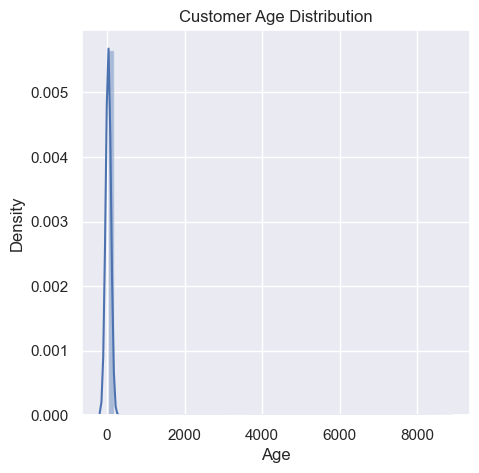

In [ ]:
sns.distplot(df['Age'], kde=True)
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

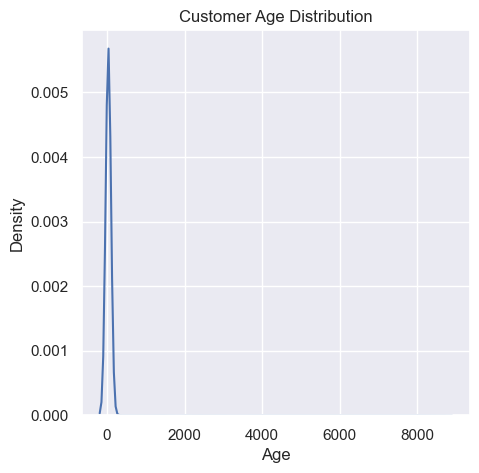

In [ ]:
sns.kdeplot(df['Age'])
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

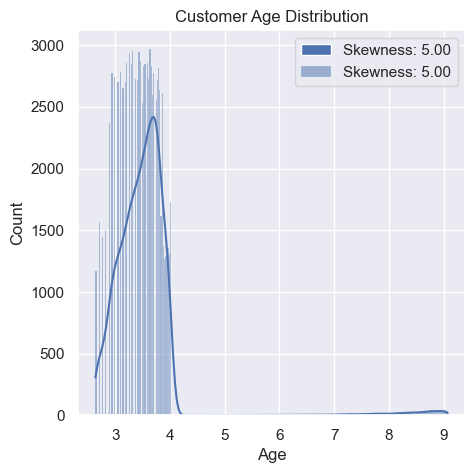

In [ ]:
modified_age = np.log(df['Age'].replace(0, np.nan)).fillna(0)

sns.histplot(modified_age, kde=True, label='Skewness: %.2f'%(modified_age.skew()))
plt.legend(loc='best')
plt.title('Customer Age Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\2121269499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))


Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

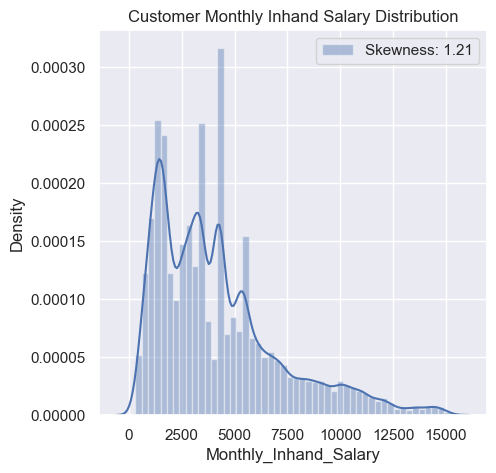

In [ ]:
### Understanding the distribution of the column - Monthly_Inhand_Salary
sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\2844325003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))


Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

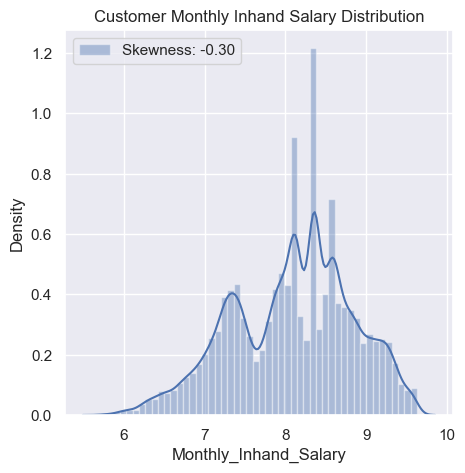

In [ ]:
### Understanding the distribution of the data log(Monthly_Inhand_Salary)

modified_salary = [np.log(salary) if salary > 0 else 0 for salary in df['Monthly_Inhand_Salary']]
df['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1592840381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))


Text(0.5, 1.0, 'Interest Rate Distribution')

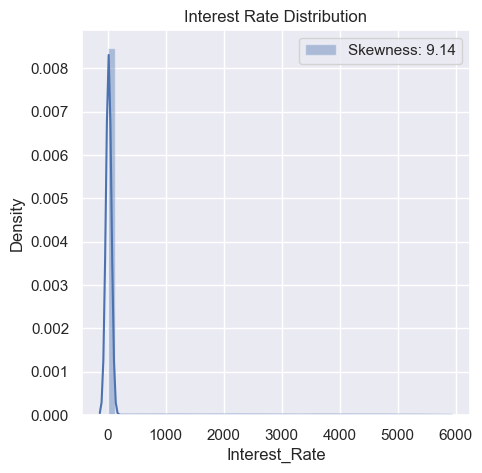

In [ ]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1914430946.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))


Text(0.5, 1.0, 'Interest Rate Distribution')

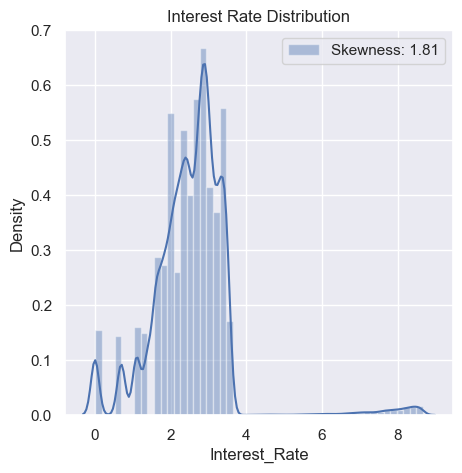

In [ ]:
### Understanding the distribution of the data log(Interest_Rate)

modified_interest = [np.log(interest) if interest > 0 else 0 for interest in df['Interest_Rate']]
df['Interest_Rate'] = modified_interest

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\4256316560.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))


Text(0.5, 1.0, 'Delayed Payment Distribution')

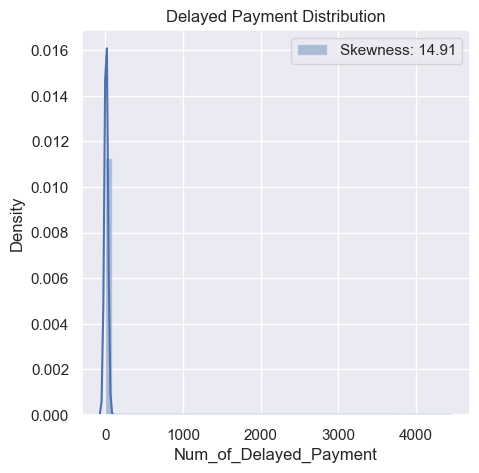

In [ ]:
### Understanding the distribution of the column - Num_of_Delayed_Payment

sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

C:\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\4030910501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))


Text(0.5, 1.0, 'Delayed Payment Distribution')

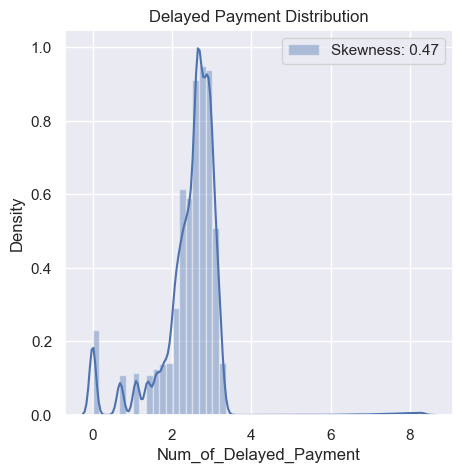

In [ ]:
modified_payment = np.log(df['Num_of_Delayed_Payment'].replace(0, np.nan)).fillna(0)
df['Num_of_Delayed_Payment'] = modified_payment

sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\259123587.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))


Text(0.5, 1.0, 'Number of Credit Inquiries')

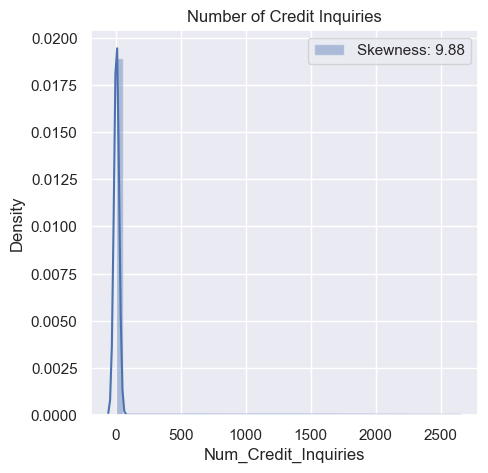

In [ ]:
### Understanding the distribution of the column - Num_Credit_Inquiries

sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')

In [ ]:
modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in df['Num_Credit_Inquiries']]
df['Num_Credit_Inquiries'] = modified_inquiries



C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\102820000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))


Text(0.5, 1.0, 'Number of Credit Card Inquiries')

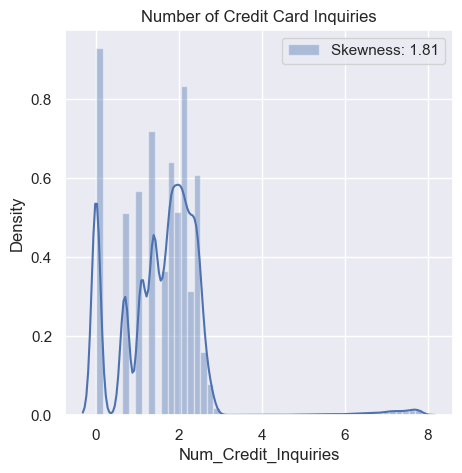

In [ ]:
sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Card Inquiries')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1462710735.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))


Text(0.5, 1.0, 'Total EMI per month Distribution')

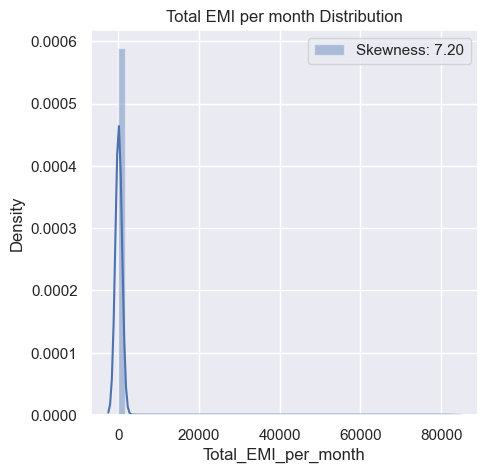

In [ ]:
### Understanding the distribution of the column - Total_EMI_per_month

sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1908501307.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))


Text(0.5, 1.0, 'Total EMI per month Distribution')

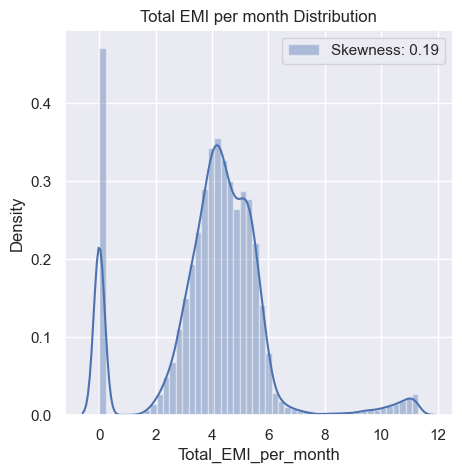

In [ ]:
### Understanding the distribution of the data log(Total_EMI_per_month)

modified_emi = [np.log(emi) if emi > 0 else 0 for emi in df['Total_EMI_per_month']]
df['Total_EMI_per_month'] = modified_emi

sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\2511643667.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))


Text(0.5, 1.0, 'Amount invested monthly Distribution')

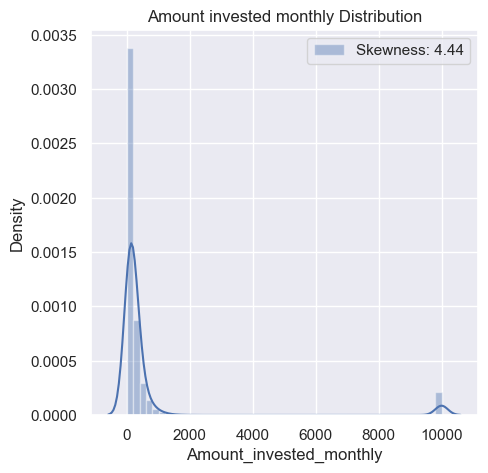

In [ ]:
### Understanding the distribution of the column - Amount_invested_monthly

sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

C:\Users\jaina\AppData\Local\Temp\ipykernel_22392\1100504778.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))


Text(0.5, 1.0, 'Amount invested monthly Distribution')

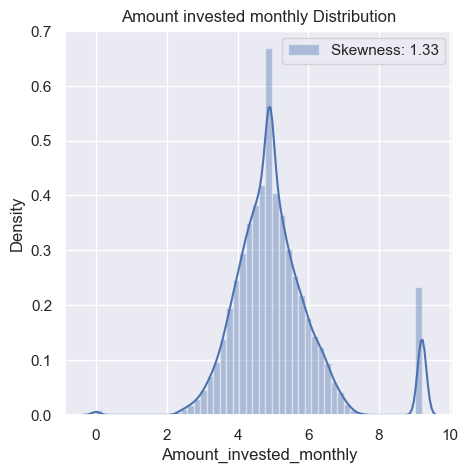

In [ ]:
modified_amount = [np.log(amount) if amount > 0 else 0 for amount in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = modified_amount

sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

## Feature Encoding

In [ ]:
### One Hot Encoding the columns - Month, Occupation, Payment_of_Min_Amount of the dataset

encoded_dataset = pd.get_dummies(data = df, 
                                       columns = ['Month', 'Occupation', 'Payment_of_Min_Amount'])
encoded_dataset

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23.0,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,0,0,0,1,0,0,0,0,1,0
1,23.0,8.591086,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,0,0,0,1,0,0,0,0,1,0
2,23.0,8.591086,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,0,0,0,1,0,0,0,0,1,0
3,23.0,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,0,0,0,1,0,0,0,0,1,0
4,23.0,8.591086,1.098612,8,1.386294,9.27,1.386294,809.98,3.903486,4.134049,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98658,25.0,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,1,0,0,0,0,0,0,0,1,0
98659,25.0,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,1,0,0,0,0,0,0,0,1,0
98660,25.0,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,1,0,0,0,0,0,0,0,1,0
98661,25.0,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
encoded_dataset.shape

(98663, 46)

In [ ]:
encoded_dataset['Target'] = encoded_dataset['Credit_Score'].map({'Excellent': 2, 'Good': 1, 'Standard': 0})
encoded_dataset.drop(['Credit_Score'], axis=1, inplace=True)

In [ ]:
### Looking at the dataset

encoded_dataset


,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Target
0,23.0,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,0,0,1,0,0,0,0,1,0,1.0
1,23.0,8.591086,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,0,0,1,0,0,0,0,1,0,1.0
2,23.0,8.591086,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,0,0,1,0,0,0,0,1,0,1.0
3,23.0,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,0,0,1,0,0,0,0,1,0,1.0
4,23.0,8.591086,1.098612,8,1.386294,9.27,1.386294,809.98,3.903486,4.134049,...,0,0,1,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98658,25.0,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,0,0,0,0,0,0,0,1,0,NaN
98659,25.0,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,0,0,0,0,0,0,0,1,0,NaN
98660,25.0,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,0,0,0,0,0,0,0,1,0,NaN
98661,25.0,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
encoded_dataset.shape

(98663, 46)

In [ ]:
encoded_dataset.isna().sum()

Age                              0
Monthly_Inhand_Salary            0
Interest_Rate                    0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Total_EMI_per_month              0
Amount_invested_monthly          0
Auto_Loan                    11287
Credit_Builder_Loan          11287
Personal_Loan                11287
Home_Equity_Loan             11287
Mortgage_Loan                11287
Student_Loan                 11287
Debt_Consolidation_Loan      11287
Payday_Loan                  11287
Month_April                      0
Month_August                     0
Month_February                   0
Month_January                    0
Month_July                       0
Month_June                       0
Month_March                      0
Month_May                        0
Occupation_Accountant            0
Occupation_Architect             0
Occupation_Developer

In [ ]:
encoded_dataset = encoded_dataset.dropna()

In [ ]:
encoded_dataset.isna().sum()

Age                          0
Monthly_Inhand_Salary        0
Interest_Rate                0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Outstanding_Debt             0
Total_EMI_per_month          0
Amount_invested_monthly      0
Auto_Loan                    0
Credit_Builder_Loan          0
Personal_Loan                0
Home_Equity_Loan             0
Mortgage_Loan                0
Student_Loan                 0
Debt_Consolidation_Loan      0
Payday_Loan                  0
Month_April                  0
Month_August                 0
Month_February               0
Month_January                0
Month_July                   0
Month_June                   0
Month_March                  0
Month_May                    0
Occupation_Accountant        0
Occupation_Architect         0
Occupation_Developer         0
Occupation_Doctor            0
Occupation_Engineer          0
Occupation_Entrepreneur      0
Occupati

# Modelling


Since Credit Score detection is a classfication problem, we will need to use classfication models to train on our model to make predictions. <br>

Logistic regression<br>
Support vector classification<br>
K-nearest neighbours<br>
Naive Bayes<br>
Decision tree<br>
Random forest<br>

In [ ]:
### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

### Splitting the dataset into X and Y for training the dataset

In [ ]:
### Splitting the data to the matrices X and Y using the training set.

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [ ]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X

array([[23.        ,  7.50924942,  1.09861229, ...,  0.        ,
         1.        ,  0.        ],
       [23.        ,  8.59108629,  1.09861229, ...,  0.        ,
         1.        ,  0.        ],
       [23.        ,  8.59108629,  1.09861229, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [29.        ,  7.56522692,  3.36729583, ...,  0.        ,
         0.        ,  1.        ],
       [25.        ,  8.11952238,  1.94591015, ...,  0.        ,
         1.        ,  0.        ],
       [25.        ,  8.11952238,  1.94591015, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
### Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train, X_test

(array([[6.75400000e+03, 9.04021079e+00, 1.94591015e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [4.90000000e+01, 9.61835667e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [2.10000000e+01, 9.08847721e+00, 2.99573227e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        ...,
        [1.90000000e+01, 7.06439963e+00, 1.94591015e+00, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [1.70000000e+01, 9.08315792e+00, 2.77258872e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.50000000e+01, 7.37748335e+00, 2.63905733e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[23.        ,  9.29633487,  2.07944154, ...,  0.        ,
          1.        ,  0.        ],
        [37.        ,  8.52281039,  3.4657359 , ...,  0.        ,
          0.        ,  1.        ],
        [44.        ,  8.87850786,  2.7080502 , ...,  0.     

In [ ]:
Y_train, Y_test

(array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 0., 0.]))

In [ ]:
# Drop NaN values from X_train and Y_train
# assume X_train and Y_train are NumPy arrays
# check for missing values in X_train
missing_rows = np.isnan(X_train).any(axis=1)

# drop missing rows from X_train and Y_train
X_train = X_train[~missing_rows]
Y_train = Y_train[~missing_rows]

In [ ]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

In [ ]:
### Dictionary to store model and its precision

model_precision = OrderedDict()

In [ ]:
### Dictionary to store model and its recall

model_recall = OrderedDict()

In [ ]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 42)
logistic_classifier.fit(X_train, Y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# Predicting the target variable for the test set
Y_pred = logistic_classifier.predict(X_test)

# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Printing the accuracy, precision, and recall of the model
logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average='weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average='weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

Confusion Matrix:
[[8441  753]
 [1717 1117]]
The accuracy of this model is 79.46 %.
The precision of this model is 77.59 %.
The recall of this model is 79.46 %.


## KNN model

In [ ]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# Predicting the target variable for the test set
Y_pred = classifier_1nn.predict(X_test)

# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Printing the accuracy, precision, and recall of the model
knn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = knn_accuracy

knn_precision = round(100 * precision_score(Y_test, Y_pred, average='weighted'), 2)
model_precision['Logistic Regression'] = knn_precision

knn_recall = round(100 * recall_score(Y_test, Y_pred, average='weighted'), 2)
model_recall['Logistic Regression'] = knn_recall

print('The accuracy of this model is {} %.'.format(knn_accuracy))
print('The precision of this model is {} %.'.format(knn_precision))
print('The recall of this model is {} %.'.format(knn_recall))

Confusion Matrix:
[[8337  857]
 [ 854 1980]]
The accuracy of this model is 85.77 %.
The precision of this model is 85.78 %.
The recall of this model is 85.77 %.


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# define the KNN model
knn_classifier = KNeighborsClassifier()

# define the range of K values to test
k_range = list(range(1, 10))

# empty lists to store the cross-validation mean scores for each K value
k_scores = []

# loop over K values to find the best one
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, Y_train, cv=7, scoring='accuracy')
    k_scores.append(scores.mean())



In [ ]:
# find the K value with the highest mean score
best_k = k_range[k_scores.index(max(k_scores))]



In [ ]:
# train the KNN model with the best K value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, Y_train)

# make predictions on the test set
Y_pred = knn_classifier.predict(X_test)



The accuracy of this model is 86.34 %.
The precision of this model is 86.54 %.
The recall of this model is 86.34 %.


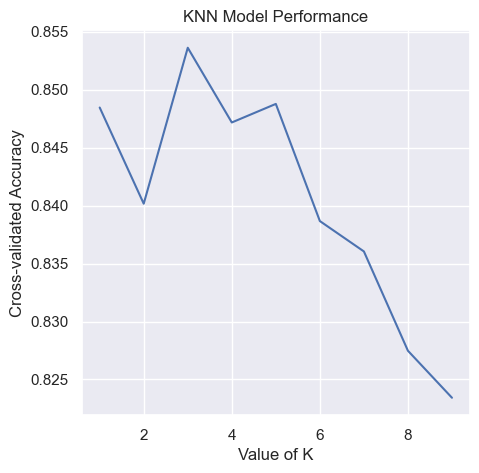

In [ ]:
# calculate accuracy, precision, and recall
knn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['KNN'] = knn_accuracy

knn_precision = round(100 * precision_score(Y_test, Y_pred, average='weighted'), 2)
model_precision['KNN'] = knn_precision

knn_recall = round(100 * recall_score(Y_test, Y_pred, average='weighted'), 2)
model_recall['KNN'] = knn_recall

print('The accuracy of this model is {} %.'.format(knn_accuracy))
print('The precision of this model is {} %.'.format(knn_precision))
print('The recall of this model is {} %.'.format(knn_recall))

# plot the cross-validation mean scores for each K value
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated Accuracy')
plt.title('KNN Model Performance')
plt.show()

## Applying Naive Bayes Classification model

In [ ]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [1. 0.]]


In [ ]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[6505 2689]
 [ 526 2308]]
The accuracy of this model is 73.27 %.
The precision of this model is 81.6 %.
The recall of this model is 73.27 %.


## Decision Tree Classification model

In [ ]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# Predicting on the test set
Y_pred = decision_tree_classifier.predict(X_test)

# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

# Printing the accuracy, precision, and recall of the model
decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
decision_tree_precision = round(100 * precision_score(Y_test, Y_pred, average='weighted'), 2)
decision_tree_recall = round(100 * recall_score(Y_test, Y_pred, average='weighted'), 2)

model_accuracy['Decision Tree'] = decision_tree_accuracy
model_precision['Decision Tree'] = decision_tree_precision
model_recall['Decision Tree'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[8351  843]
 [ 867 1967]]
The accuracy of this model is 85.78 %.
The precision of this model is 85.74 %.
The recall of this model is 85.78 %.


In [ ]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# create a Random Forest Classifier with default values
rf_classifier = RandomForestClassifier(random_state=42)

# fit the classifier on the training data
rf_classifier.fit(X_train, Y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# predict the test data
Y_pred = rf_classifier.predict(X_test)

# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

# Printing the accuracy, precision, and recall of the model
rf_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest'] = rf_accuracy

rf_precision = round(100 * precision_score(Y_test, Y_pred, average='weighted'), 2)
model_precision['Random Forest'] = rf_precision

rf_recall = round(100 * recall_score(Y_test, Y_pred, average='weighted'), 2)
model_recall['Random Forest'] = rf_recall

print('The accuracy of this model is {} %.'.format(rf_accuracy))
print('The precision of this model is {} %.'.format(rf_precision))
print('The recall of this model is {} %.'.format(rf_recall))



[[8684  510]
 [ 910 1924]]
The accuracy of this model is 88.19 %.
The precision of this model is 87.81 %.
The recall of this model is 88.19 %.


In [ ]:
# set up a range of n_estimators
n_estimators_range = np.arange(1, 51, 1)

# create an empty list to store the accuracies for each n_estimators value
n_estimators_accuracy = []

# loop through the n_estimators range and fit the classifier for each value
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=n_estimators)
    rf_classifier.fit(X_train, Y_train)
    Y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    n_estimators_accuracy.append(accuracy)
    
# find the index of the maximum accuracy value
max_index = np.argmax(n_estimators_accuracy)

# find the best n_estimators value
best_n_estimators = n_estimators_range[max_index]

print('The best value of n_estimators is: {}'.format(best_n_estimators))

The best value of n_estimators is: 49


In [ ]:
# Defining XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [ ]:
# Converting dataset into DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(data = X_train, label = Y_train)
test_dmatrix = xgb.DMatrix(data = X_test, label = Y_test)

In [ ]:
# Training XGBoost model
xgb_classifier = xgb.train(params = params, dtrain = train_dmatrix, num_boost_round = 100)

# Making predictions on test set
Y_pred = xgb_classifier.predict(test_dmatrix)

# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)



[[8244  950]
 [1011 1823]]


In [ ]:
# Printing the accuracy, precision, and recall of the model
xgb_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['XGBoost'] = xgb_accuracy

xgb_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['XGBoost'] = xgb_precision

xgb_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['XGBoost'] = xgb_recall

print('The accuracy of this model is {} %.'.format(xgb_accuracy))
print('The precision of this model is {} %.'.format(xgb_precision))
print('The recall of this model is {} %.'.format(xgb_recall))


The accuracy of this model is 83.7 %.
The precision of this model is 83.58 %.
The recall of this model is 83.7 %.


## Stacking Classifier

In [ ]:
 ### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('Knn', knn_accuracy))
base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('XgBoost', xgb_accuracy))

### Define the meta models

meta_model = logistic_classifier

In [ ]:
### Looking at the model accuracy dictionary

model_accuracy

OrderedDict([('Logistic Regression', 85.77),
             ('KNN', 86.34),
             ('Gaussian Naive Bayes', 73.27),
             ('Decision Tree', 85.78),
             ('Random Forest', 88.19),
             ('XGBoost', 83.7)])

In [ ]:
### Looking at the model precision dictionary

model_precision

OrderedDict([('Logistic Regression', 85.78),
             ('KNN', 86.54),
             ('Gaussian Naive Bayes', 81.6),
             ('Decision Tree', 85.74),
             ('Random Forest', 87.81),
             ('XGBoost', 83.58)])

In [ ]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 85.77),
             ('KNN', 86.34),
             ('Gaussian Naive Bayes', 73.27),
             ('Decision Tree', 85.78),
             ('Random Forest', 88.19),
             ('XGBoost', 83.7)])

In [ ]:
# Create a dataframe with the model results
results_df = pd.DataFrame({'Classification Model': list(model_accuracy.keys()),
                           'Model Accuracy': list(model_accuracy.values()),
                           'Model Precision': list(model_precision.values()),
                           'Model Recall': list(model_recall.values())})

# Add a S.No. column
results_df.insert(0, 'S.No.', range(1, 1 + len(results_df)))

# Print the dataframe
print(results_df.to_string(index=False))

 S.No. Classification Model  Model Accuracy  Model Precision  Model Recall
     1  Logistic Regression           85.77            85.78         85.77
     2                  KNN           86.34            86.54         86.34
     3 Gaussian Naive Bayes           73.27            81.60         73.27
     4        Decision Tree           85.78            85.74         85.78
     5        Random Forest           88.19            87.81         88.19
     6              XGBoost           83.70            83.58         83.70


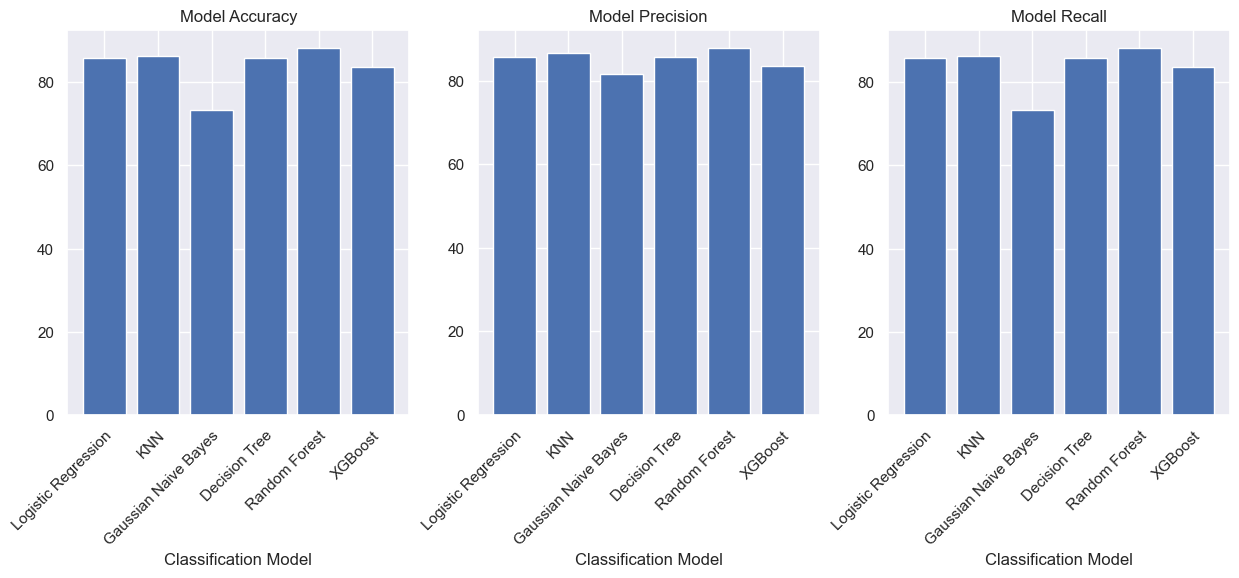

In [ ]:
# Plot model accuracy, precision, and recall
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(results_df['Classification Model'], results_df['Model Accuracy'])
ax[0].set_title('Model Accuracy')

ax[1].bar(results_df['Classification Model'], results_df['Model Precision'])
ax[1].set_title('Model Precision')

ax[2].bar(results_df['Classification Model'], results_df['Model Recall'])
ax[2].set_title('Model Recall')

# Add x-label and rotate the x-ticks
for axis in ax:
    axis.set_xlabel('Classification Model')
    plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

Hence our recommended model - Random Forest Classifier provides:<br/>
model accuracy of 88.19%
model precision of 87.81%<br/> 
model recall of 88.19%.<br/>